In [9]:
print ("TMath::Landau(x, %s, %f)" % ("s" , 10))

TMath::Landau(x, s, 10.000000)


Will now draw bg
Will now draw signal
Will now draw bg
Will now draw signal


Warning in <TCanvas::Constructor>: Deleting canvas with same name: PulseAmplitudes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: PulseAmplitudes1


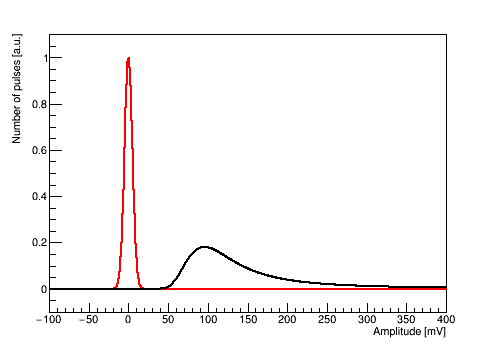

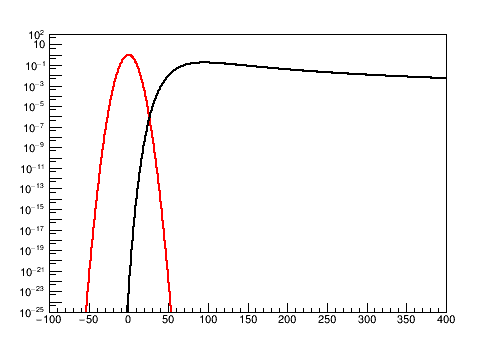

In [104]:
import ROOT

plotXStart = -100
plotXEnd = 400

sigmaNoise = 5  # we'll work in mV, so this means the standard deviation for the noise is 5 mV
sigmaSignal = 20
MPV = 100

# let's create a function describing the distribution of amplitudes we expect to get from electronic noise
fNoise = ROOT.TF1("ElecNoiseBg", "TMath::Gaus(x, 0, %f)" % sigmaNoise, plotXStart, plotXEnd) # define it in [-100, 500] mV
fNoise2 = ROOT.TF1("ElecNoiseBg2", "TMath::Gaus(x, 0, %f)" % sigmaNoise, plotXStart, plotXEnd) # define it in [-100, 500] mV
fNoise.SetNpx(1000) # this makes sure the function is drawn with many points, to remove jaggedness (default is 100)
fNoise2.SetNpx(1000) # this makes sure the function is drawn with many points, to remove jaggedness (default is 100)

fSignal = ROOT.TF1("Signal", "TMath::Landau(x, %f, %f)" % (MPV, sigmaSignal), plotXStart, plotXEnd) 
fSignal2 = ROOT.TF1("Signal2", "TMath::Landau(x, %f, %f)" % (MPV, sigmaSignal), plotXStart, plotXEnd) 
fSignal.SetNpx(1000)
fSignal2.SetNpx(1000)

# we need to create a canvas to draw our functions on
canvas = ROOT.TCanvas("PulseAmplitudes", "Pulse amplitudes", 500, 375)
#fNoise.Draw()
#fSignal.Draw("SAME") # the option draws this function on top of anything that was already on the canvas


fNoise.GetHistogram().GetXaxis().SetTitle("Amplitude [mV]")
fNoise.GetHistogram().GetYaxis().SetTitle("Number of pulses [a.u.]")
fNoise.SetTitle("") # remove the title
fNoise2.SetTitle("") # remove the title
#canvas.Draw()

# let's make it easier to draw these with different colors etc through a dict
# this dict will be used to set the style of the various functions and histograms we'll make
plots = {
    "bg" : {
        "hist" : fNoise,
        "color" : ROOT.kRed,
        "drawrangex" : [-100, 400],
        "drawrangey" : [-0.1, 1.1]
    },
    "signal" : {
        "hist" : fSignal,
        "color" : ROOT.kBlack,
        "drawrangex" : [-100, 400],
        "drawrangey" : [-0.1, 1.1]
    }
}
plots2 = {
    "bg" : {
        "hist" : fNoise2,
        "color" : ROOT.kRed,
        "drawrangex" : [-100, 400],
        "drawrangey" : [1e-25, 100]
    },
    "signal" : {
        "hist" : fSignal2,
        "color" : ROOT.kBlack,
        "drawrangex" : [-100, 400],
        "drawrangey" : [1e-25, 100]
    }
}

# function to draw all functions
def drawFunctions(plots):
    counter = 0
    
    for p in plots:
        print("Will now draw %s" % p)
        plots[p]["hist"].SetLineColor(plots[p]["color"])
        plots[p]["hist"].GetXaxis().SetRangeUser(plots[p]["drawrangex"][0], plots[p]["drawrangex"][1])
        plots[p]["hist"].GetYaxis().SetRangeUser(plots[p]["drawrangey"][0], plots[p]["drawrangey"][1])
        #plots[p]["hist"].SetMaximum(plots[p]["drawrangey"][1])
        #plots[p]["hist"].SetMinimum(plots[p]["drawrangey"][1])
        
        plots[p]["hist"].SetMinimum(plots[p]["drawrangey"][0])
        plots[p]["hist"].SetMaximum(plots[p]["drawrangey"][1])
        
            
        drawOptions = ""
        if counter > 0:
            drawOptions += "LSAME"
        plots[p]["hist"].Draw(drawOptions)
        counter += 1
        
drawFunctions(plots)
canvas.Draw()

canvas1 = ROOT.TCanvas("PulseAmplitudes1", "Pulse amplitudes", 500, 375)
canvas1.SetLogy(1)
drawFunctions(plots2)
canvas1.Draw()

In [107]:
# let's see what fraction of the pulses we'll get if we put a threshold at 50 mV
threshold = 50 # corresponding to 5 sigma for the bg
selectedSignal = fSignal.Integral(threshold, plotXEnd)
allSignal = fSignal.Integral(plotXStart, plotXEnd)
print("Fraction of signal pulses below threshold: %E" % ((allSignal-selectedSignal)/allSignal))

selectedNoise = fNoise.Integral(threshold, plotXEnd)
allNoise = fNoise.Integral(plotXStart, plotXEnd)
print("Fraction of background pulses above threshold: %E" % (selectedNoise/allNoise))

Fraction of signal pulses below threshold: 2.124902E-03
Fraction of background pulses above threshold: 7.754164E-24


In [110]:
# given that HGTD has 4M channels, how many noise hits do we expect in an event where the whole
# detector is read out, with the current S/B (100/5 = 20) and this threshold?
#allNoise*(selectedNoise/allNoise)
print(allSignal)
print(allNoise)
print(selectedNoise*4e6)

18.465878893385028
12.533141373155
3.887361160324546e-16


In [ ]:
# What happens when  the response to real particles deteriorates and S/B gets worse?